# Insurance Dataset Overview

## Columns:
- age: Numeric. The age of the individual.
- sex: Categorical. The gender of the individual (male or female).
- bmi: Numeric. Body Mass Index, providing an indication of whether the individual is underweight, normal weight, overweight, or obese.
- children: Numeric. The number of children/dependents covered by the insurance plan.
- smoker: Categorical. Whether the individual smokes (yes or no).
- Region: Categorical. The individual's residential area in the US (northeast, northwest, southeast, southwest).
- Charges: Numeric. The medical charges are billed to health insurance.


## Purpose:
- The dataset is commonly used to predict healthcare charges based on personal attributes such as age, gender, BMI, number of children, smoking status, and region. This prediction is typically done using regression techniques, particularly linear regression.

## Usage:
- This dataset can be used for various analytical and predictive tasks, including:
- Exploratory Data Analysis (EDA): Understand the distribution of individual features, relationships between features, and identify patterns.
- Predictive Modeling: Build regression models to predict medical charges based on the individual's attributes.
- Feature Engineering: Create new features or transform existing ones to improve model performance.

In [69]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [70]:
# Load the dataset
df = pd.read_csv(r"C:\Users\mdsha\Downloads\archive (16)\insurance.csv")

In [71]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [72]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [73]:
df.shape

(1338, 7)

In [74]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [75]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [76]:
df.count().sum()

9366

# Visualization

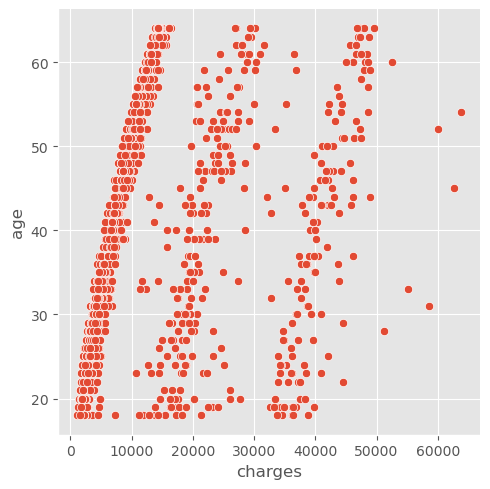

In [77]:
sns.relplot(x = 'charges', y = 'age', data = df)

# Model

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [79]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

In [87]:
# Define features and target variable
X = df_encoded.drop(['charges', 'age'],axis = 1)
y = df_encoded['charges']

In [88]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [90]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [91]:
y_pred

array([ 7393.23901144,  7965.21743974, 29878.84619944,  7938.06572617,
       31883.76327346, 13352.05310012,  4859.06429011, 11149.68634273,
        2915.7230488 ,  9156.93594945, 30120.53816506,  9336.25921752,
        7693.86653684, 37321.21489152, 34908.23573413, 35302.84685719,
       13718.57201133, 33818.70226489,  7056.49467136, 29878.84619944,
        7916.55271194,  9696.15602034,  7571.53554813, 12234.18249768,
        8999.98340748,  9285.30292525,  9595.71919518,  9943.62487066,
        7983.01492592,  7235.4969042 ,  9623.40622539,  8712.26693142,
        9272.09688629,  5618.60149776,  8013.02903214, 12155.22467385,
        6602.02665096,  8050.5990725 , 29345.65738268, 33147.8991374 ,
        9940.73635899,  9043.761754  , 10492.47829739,  5998.97668955,
       10771.44079284,  6978.33444532, 10673.40565892,  6946.97243385,
       34680.67430596, 11864.07827652,  9863.94218995,  7523.85558937,
       13290.46937354,  6493.37589478,  9011.03281518, 10184.52397144,
      

In [92]:
model.score(X_test, y_test)

0.6990114352316631

In [93]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [94]:
# Print performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 46728092.873813815
R-squared (R²): 0.6990114352316631


# Plot actual vs. predicted values

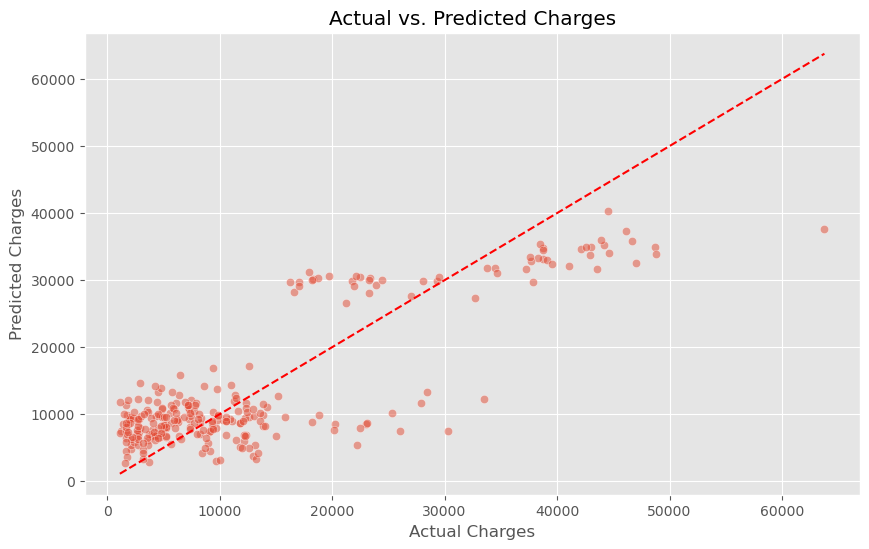

In [95]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, edgecolor='w')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges')
plt.show()